# 基于深度强化学习的单智能体决策过程方法研究————任务一：场景搭建

### 基础静态场景:

基础静态场景可以用来训练设计单无人机动态避障路径规划、区域搜索任务。对于**动态避障路径规划**任务，需要在静态场景中明确无人机的起点与终点，起点与终点的路径处，随机分布着影响无人机飞行的障碍物（例如树木，山丘，楼区等）我们需要通过设计算法，让无人机巧妙的避开这些障碍物，保证无人机不会撞在障碍物上边，且无人机可以选择相对较优的路线，可以尽可能节省无人机的飞行时间。

对于**区域搜索**任务，我们需要在静态场景中明确无人机的起始位置，无人机需要搜索的区域位置，以及区域中的目标物信息及检测方法。我们需要在动态避障路径规划任务的基础上，设计算法，让无人机能够搜索到目标区域中的目标物，并尽可能的减少无人机的飞行时间。

### 1.动态避障路径规划任务场景搭建
对于该任务，我们需要在静态场景中明确无人机的起点与终点，起点与终点的路径处，随机分布着影响无人机飞行的障碍物（例如树木，山丘，楼区等）我们需要通过设计算法，让无人机巧妙的避开这些障碍物，保证无人机不会撞在障碍物上边，且无人机可以选择相对较优的路线，可以尽可能节省无人机的飞行时间，或尽可能减少无人机的电量使用。

为了实现该任务并结合深度学习框架，我们需要将3D场景导入并转换为一个3D数组，该数组每个值代表该位置的障碍物信息，0代表无障碍物，1代表有障碍物。对于深度强化学习的决策过程，我们需要结合路径规划的先验经验，相关算法，将该3D数组、无人机当前位置、终点位置作为输入，将无人机接下来需要前进的方向（6个方向或26个方向，参考“魔方”）作为输出，让无人机能够避开障碍物，并选择最优的路径。

让我们首先创建一个飞行环境，该飞行环境与task1任务重环境相同。

In [1]:
import sys
sys.path.append('..')
import UAVENVmudule_design as UE

In [2]:
cuboid1 = {"type":"cuboid","feature_points":[[10, 10, 5],[2, 2, 10]]}
cuboid2 = {"type":"cuboid","feature_points":[[10, 5, 5],[2, 2, 10]]}
cuboid3 = {"type":"spheroid","feature_points":[[20, 20, 5],[3, 4, 5]]}

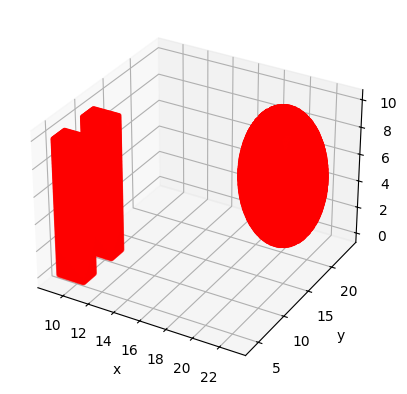

In [3]:
envlist = [cuboid1, cuboid2, cuboid3]
env = UE.solid_env(envlist)
env.show_solid_env()

让我们将其离散化看看吧

In [4]:
env_discretizing = UE.solid_env_discretizing(env, [0,25], [0,25], [0,10], dx=0.1)


让我们看看离散化后的三维数组吧

In [5]:
env_discretizied = env_discretizing.get_discetized_env()

让我们将其绘制出来吧

C:\Users\sswun\AppData\Local\Temp\ipykernel_34592\910054225.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap=cm.coolwarm, edgecolor='k')


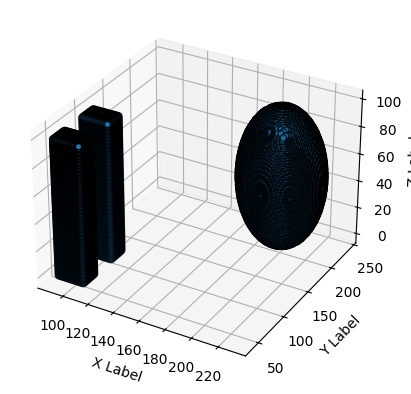

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


array_3d = env_discretizied

# 获取非零元素的坐标
x, y, z = np.where(array_3d == 1)

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用plot_trisurf绘制表面
ax.scatter(x, y, z, cmap=cm.coolwarm, edgecolor='k')

# 设置坐标轴标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 显示图形
plt.show()


可以看到，离散化后的三维数组中，障碍物已经被表示为1，而空地则表示为0。我们将绘图方法集成到UE.solid_env_discretizing类中，以便更方便地使用。

f:\desk\Design-of-Simple-Python-UAV-Env\tasks_design\..\UAVENVmudule_design\env_design\env.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap=cm.coolwarm, edgecolor='k')


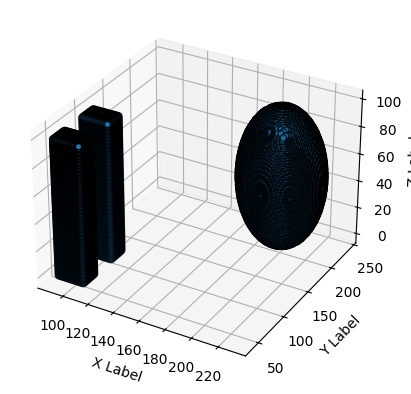

In [5]:
env_discretizing.show_discretized_env()